# Exploratory Analysis of features datasets

* Files from Features Extraction:

** mldataset folder:**

*allfeatures.csv*

*featuresCORR.csv*

*featuresPaired.csv*

*featuresPVAL.csv*

*featuresROC.csv*

*featuresZTEST.csv*

In [2]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="MBGyCd1hOFVR5EcPbUFAX8MHV",
                        project_name="eeg-trauma", workspace="bfaria-eeg")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bfaria-eeg/eeg-trauma/1e547de6101a4dacabd63c6a475d0cf9



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_all = pd.read_csv('../mldataset/allfeatures.csv')
data_corr = pd.read_csv('../mldataset/featuresCORR.csv')
data_pair = pd.read_csv('../mldataset/featuresPaired.csv')
data_pval = pd.read_csv('../mldataset/featuresPVAL.csv')
data_roc = pd.read_csv('../mldataset/featuresROC.csv')
data_ztest = pd.read_csv('../mldataset/featuresZTEST.csv')

# 1) One more features selection

* Recursive feature elimination (RFE)
    * This were used to find the minimal features able to given us a better classification report

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ConvergenceWarning)

In [6]:
X = data_all.drop(['fn','target'], axis=1)
y = data_all.target

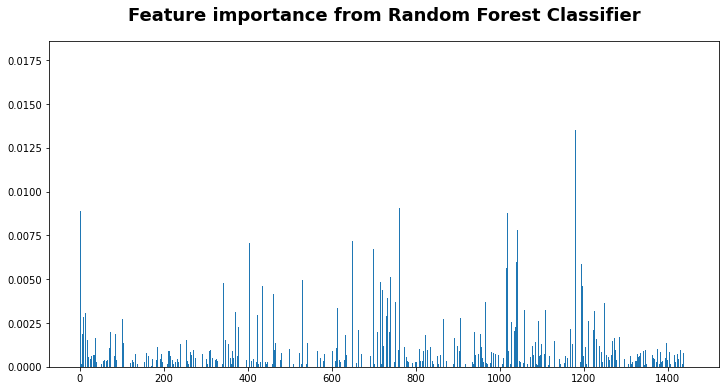

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=6f76cf5fcaa54da580037cfd1901f6a8&experimentKey=1e547de6101a4dacabd63c6a475d0cf9',
 'imageId': '6f76cf5fcaa54da580037cfd1901f6a8',
 'web': 'https://www.comet.ml/api/image/download?imageId=6f76cf5fcaa54da580037cfd1901f6a8&experimentKey=1e547de6101a4dacabd63c6a475d0cf9'}

In [7]:
rfc = RandomForestClassifier(random_state=101, class_weight='balanced')
rfc.fit(X, y)
importance = rfc.feature_importances_

for i,v in enumerate(importance):
    if v > 0.3:
        print('Feature: %0d, Score: %.5f' % (i,v))
        
# plot feature importance
fig1 = plt.figure(figsize=(12, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature importance from Random Forest Classifier', fontsize=18, fontweight='bold', pad=20)
plt.show()

experiment.log_figure(figure=fig1)

In [8]:
#rfc = RandomForestClassifier(random_state=101, class_weight='balanced')
kfold = StratifiedKFold(n_splits=10, shuffle=True) 
cv = kfold.split(X, y)
rfecv = RFECV(estimator=rfc, step=10, min_features_to_select=20, cv=cv)
%time rfecv.fit(X, y)

CPU times: user 4min 56s, sys: 3.12 s, total: 4min 59s
Wall time: 5min


RFECV(cv=<generator object _BaseKFold.split at 0x7f7f16607048>,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=20, n_jobs=None, scoring=None, step=10, verbose=0)

In [9]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 29


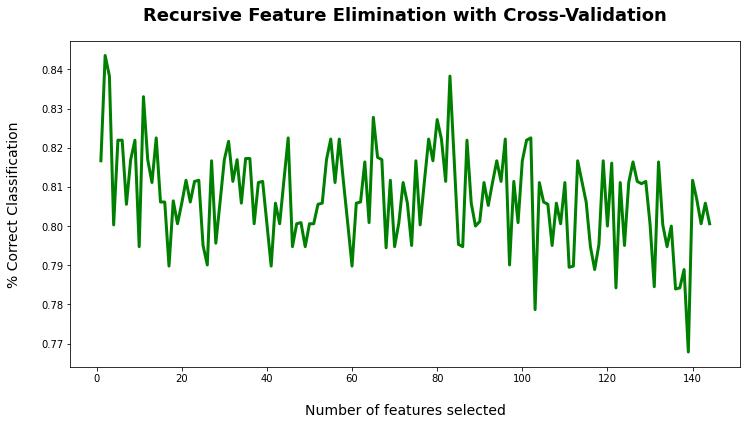

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=11b36b9da9134411a4e915fdc600b317&experimentKey=1e547de6101a4dacabd63c6a475d0cf9',
 'imageId': '11b36b9da9134411a4e915fdc600b317',
 'web': 'https://www.comet.ml/api/image/download?imageId=11b36b9da9134411a4e915fdc600b317&experimentKey=1e547de6101a4dacabd63c6a475d0cf9'}

In [10]:
fig2 = plt.figure(figsize=(12, 6))

plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='green', linewidth=3)
plt.show()

experiment.log_figure(figure=fig2)

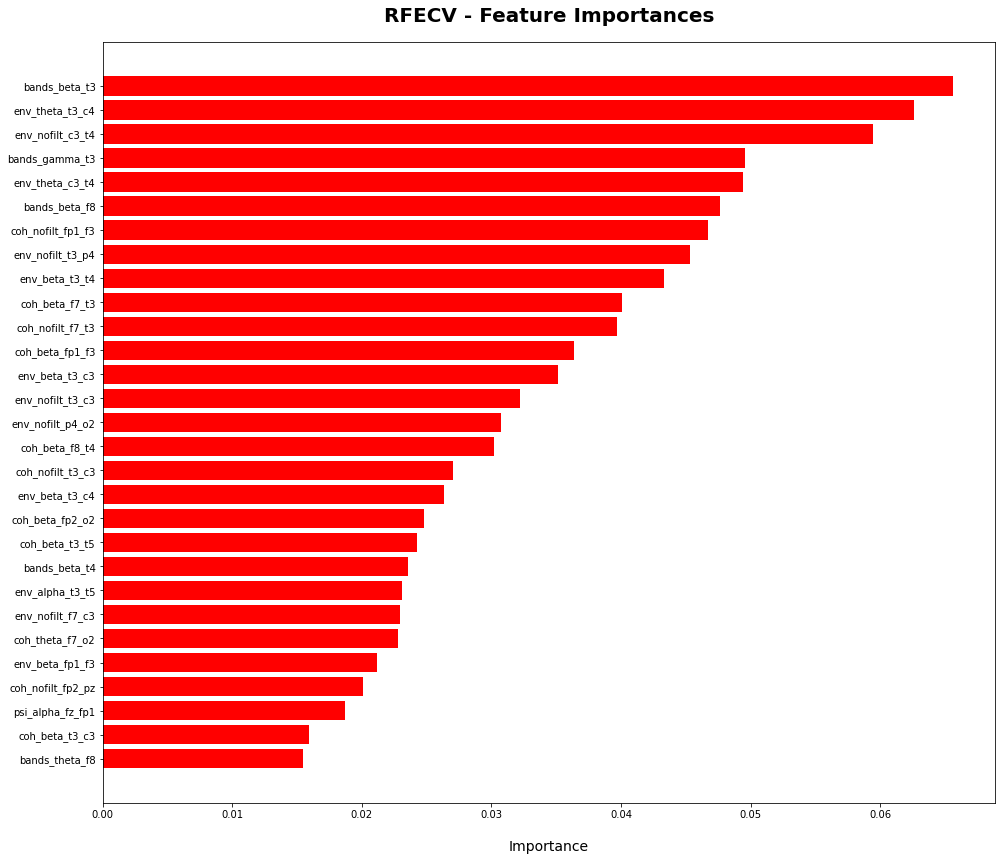

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=b3381b134d8f48f692ab86bd8c6ae9c7&experimentKey=1e547de6101a4dacabd63c6a475d0cf9',
 'imageId': 'b3381b134d8f48f692ab86bd8c6ae9c7',
 'web': 'https://www.comet.ml/api/image/download?imageId=b3381b134d8f48f692ab86bd8c6ae9c7&experimentKey=1e547de6101a4dacabd63c6a475d0cf9'}

In [11]:
X2 = X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1)

dset = pd.DataFrame()

dset['attr'] = X2.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=True)

fig3 = plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='red')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

experiment.log_figure(figure=fig3)

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=bc482ca6289840f18e605db470f31e33&experimentKey=1e547de6101a4dacabd63c6a475d0cf9',
 'imageId': 'bc482ca6289840f18e605db470f31e33',
 'web': 'https://www.comet.ml/api/image/download?imageId=bc482ca6289840f18e605db470f31e33&experimentKey=1e547de6101a4dacabd63c6a475d0cf9'}

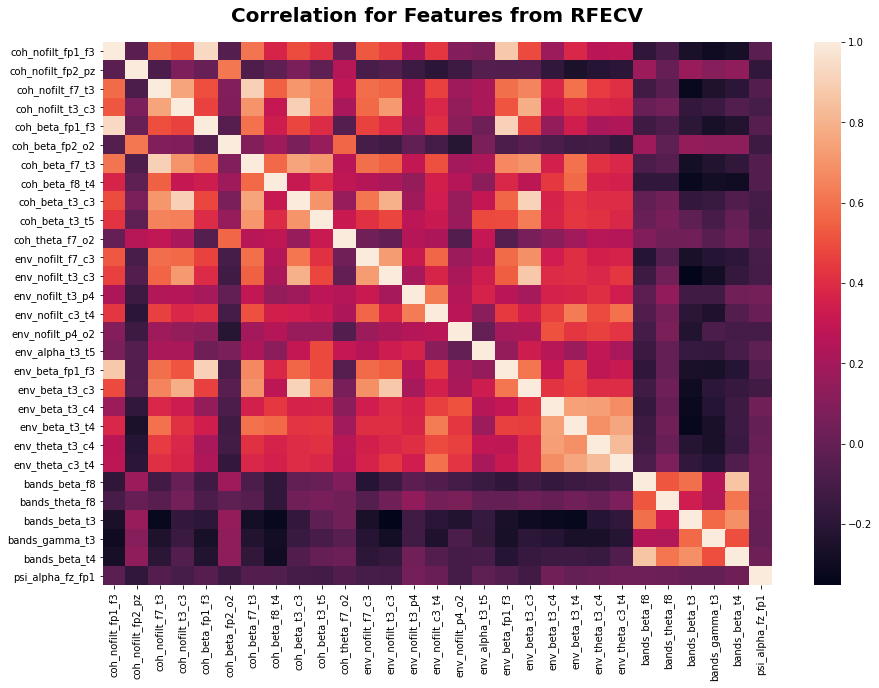

In [12]:
corrmap = X2.corr().drop_duplicates()

fig4 = plt.figure(figsize=(15,10))
sns.heatmap(corrmap, cbar=True)
plt.title('Correlation for Features from RFECV', fontsize=20, fontweight='bold', pad=20)

experiment.log_figure(figure=fig4)

In [14]:
X2[['fn','target']] = data_all[['fn','target']]
X2.to_csv('../mldataset/featuresML.csv', index=False)
X2

,coh_nofilt_fp1_f3,coh_nofilt_fp2_pz,coh_nofilt_f7_t3,coh_nofilt_t3_c3,coh_beta_fp1_f3,coh_beta_fp2_o2,coh_beta_f7_t3,coh_beta_f8_t4,coh_beta_t3_c3,coh_beta_t3_t5,...,env_theta_t3_c4,env_theta_c3_t4,bands_beta_f8,bands_theta_f8,bands_beta_t3,bands_gamma_t3,bands_beta_t4,psi_alpha_fz_fp1,fn,target
0,0.857365,0.598601,0.735782,0.711858,0.907236,0.656662,0.667533,0.818214,0.679529,0.743059,...,0.276645,0.277616,0.006395,0.005768,0.006494,0.000206,0.007673,1.974668,00b2d6e257e2f615.csv,trauma
1,0.775378,0.462641,0.740455,0.752089,0.778246,0.551994,0.765772,0.777790,0.695963,0.761634,...,0.207531,0.259119,0.012355,0.007541,0.011056,0.000261,0.009891,0.328779,09769097749fb286.csv,trauma
2,0.861601,0.608105,0.684884,0.566620,0.824410,0.694576,0.727593,0.771918,0.696993,0.745449,...,0.104273,0.082459,0.008266,0.005058,0.012101,0.000345,0.009680,-0.456302,0b84dd748e7d5edd.csv,trauma
3,0.833709,0.762546,0.824584,0.872429,0.945076,0.547642,0.630405,0.538873,0.773210,0.770875,...,0.134421,0.128373,0.015155,0.003900,0.012688,0.000515,0.012579,-0.515633,158ce5e17a662599.csv,trauma
4,0.887078,0.384395,0.785085,0.669723,0.865782,0.399770,0.812996,0.820392,0.546730,0.746709,...,0.286608,0.394275,0.009656,0.005332,0.012842,0.001847,0.010304,0.343956,17df70855fa4922a.csv,trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.576064,0.370776,0.654506,0.831554,0.661389,0.407475,0.698181,0.424769,0.869548,0.842076,...,0.273795,0.541565,0.056193,0.174590,0.052195,0.012676,0.131831,-10.572390,b5abacb75ebc40b8.csv,healthy
181,0.384045,0.362990,0.809818,0.873016,0.373086,0.356862,0.863759,0.970902,0.899040,0.944191,...,0.477249,0.458986,0.001266,0.001582,0.002670,0.000314,0.003727,0.214012,bb47addde80c51c0.csv,healthy
182,0.834045,0.400356,0.892363,0.732350,0.876810,0.516392,0.910603,0.904642,0.744009,0.846009,...,0.725392,0.647903,0.005584,0.004330,0.005858,0.000640,0.006279,-0.130126,bc9ecd77d29ef5fb.csv,healthy
183,0.906435,0.344764,0.887011,0.865872,0.926126,0.354257,0.883980,0.722524,0.852169,0.870898,...,0.370937,0.513153,0.005905,0.008089,0.011235,0.000735,0.007409,-0.925306,bcfaa165d982034b.csv,healthy


# 2) Exploratoring features

In [15]:
# Verifying feature extraction

print('All features: ', data_all.shape)
print('Features from Roc-auc score: ',data_roc.shape)
print('Features from Paired t-test: ', data_pair.shape)
print('Features from Z-test: ', data_ztest.shape)
print('Features with Correlation < 0.75: ', data_corr.shape)
print('Features from Pval (corr): ', data_pval.shape)
print('Features from RFE: ', X2.shape)

All features:  (185, 1451)
Features from Roc-auc score:  (185, 134)
Features from Paired t-test:  (185, 174)
Features from Z-test:  (185, 165)
Features with Correlation < 0.75:  (185, 108)
Features from Pval (corr):  (185, 28)
Features from RFE:  (185, 31)


In [21]:
# Getting intersection between all datasets

cols = []

for i in data_all.columns:
    if i == 'fn' or i == 'target':
        continue
        
    if i in data_roc.columns and i in data_pair.columns and i in data_ztest.columns and i in data_corr.columns:
        cols.append(i)
print('Intersection Features: ',len(cols))
print(cols)

cols2 = []
for i in cols:
    if i in data_pval.columns and i in X2.columns:
        cols2.append(i)

print('Intersection for all datasets: ',len(cols2))
print(cols2)

Intersection Features:  6
['coh_nofilt_fp1_f7', 'coh_nofilt_f8_t4', 'env_nofilt_c4_t6', 'env_nofilt_t4_p4', 'env_beta_fp1_c4', 'bands_beta_t3']
Intersection for all datasets:  1
['bands_beta_t3']


{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=3da5b1f19d0b451a9278b6c537adc375&experimentKey=1e547de6101a4dacabd63c6a475d0cf9',
 'imageId': '3da5b1f19d0b451a9278b6c537adc375',
 'web': 'https://www.comet.ml/api/image/download?imageId=3da5b1f19d0b451a9278b6c537adc375&experimentKey=1e547de6101a4dacabd63c6a475d0cf9'}

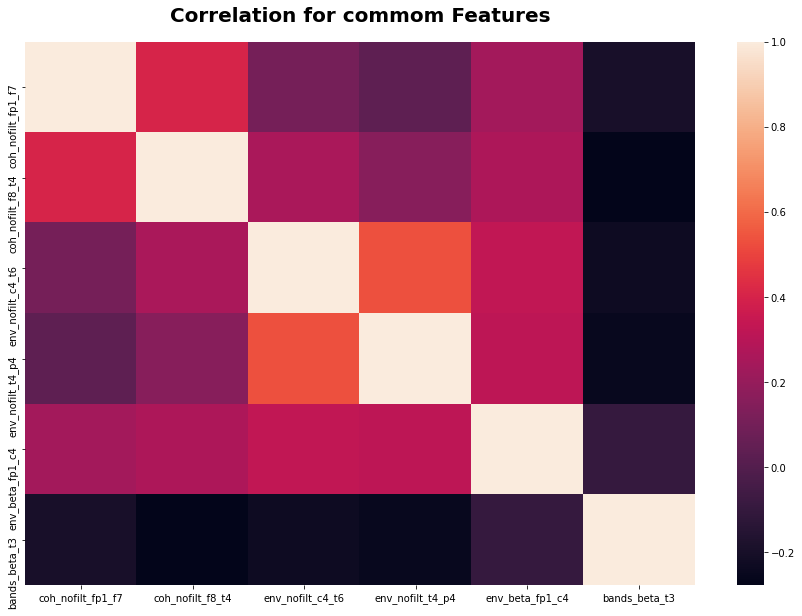

In [22]:
data_inter = data_all[['coh_nofilt_fp1_f7', 'coh_nofilt_f8_t4', 'env_nofilt_c4_t6', 'env_nofilt_t4_p4', 'env_beta_fp1_c4', 'bands_beta_t3']]

corr = data_inter.corr()

fig5 = plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True)
plt.title('Correlation for commom Features', fontsize=20, fontweight='bold', pad=20)

experiment.log_figure(figure=fig5)

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=02a33aa778c74ac8bad59a476f645df8&experimentKey=1e547de6101a4dacabd63c6a475d0cf9',
 'imageId': '02a33aa778c74ac8bad59a476f645df8',
 'web': 'https://www.comet.ml/api/image/download?imageId=02a33aa778c74ac8bad59a476f645df8&experimentKey=1e547de6101a4dacabd63c6a475d0cf9'}

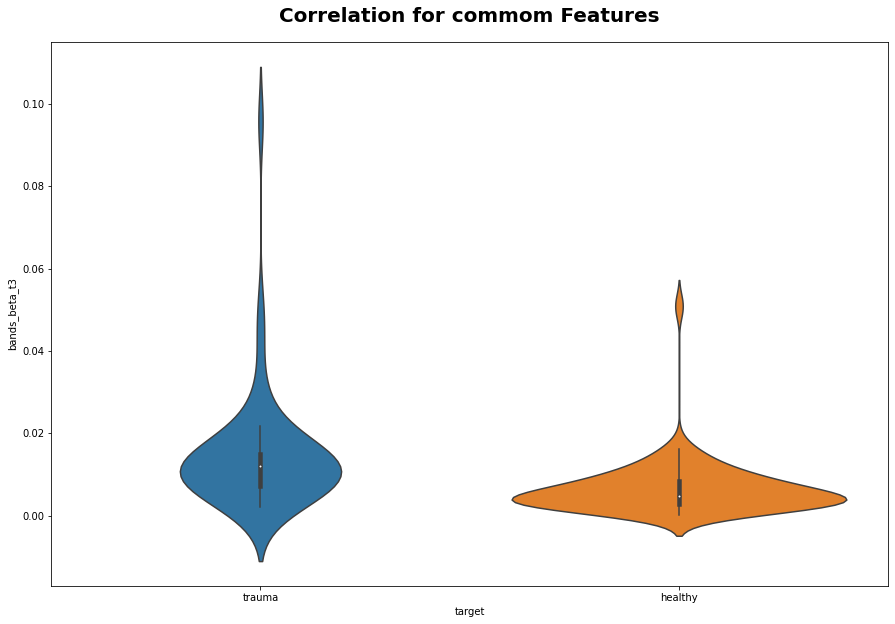

In [24]:
data_all['bands_beta_t3']

fig6 = plt.figure(figsize=(15,10))

sns.violinplot(x=data_all['target'], y=data_all['bands_beta_t3'])

plt.title('Correlation for commom Features', fontsize=20, fontweight='bold', pad=20)

experiment.log_figure(figure=fig6)

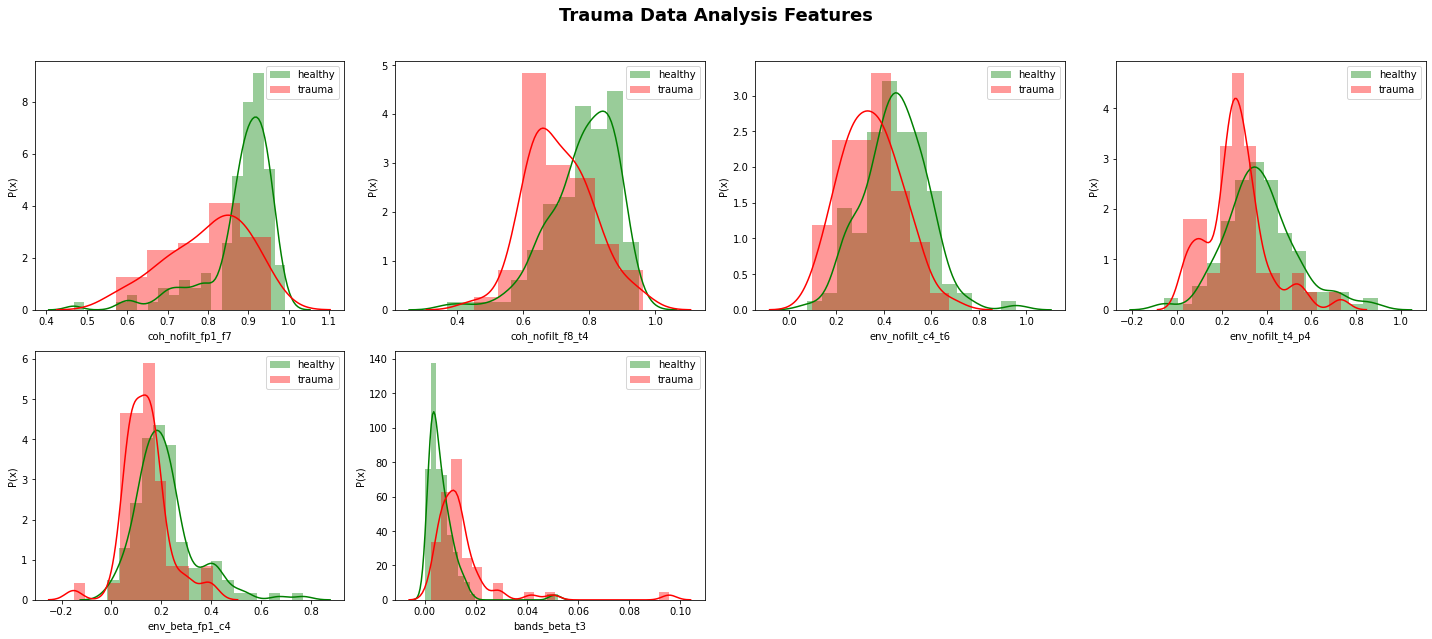

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=87d8490d921d491f85d7cc75253f06e7&experimentKey=1e547de6101a4dacabd63c6a475d0cf9',
 'imageId': '87d8490d921d491f85d7cc75253f06e7',
 'web': 'https://www.comet.ml/api/image/download?imageId=87d8490d921d491f85d7cc75253f06e7&experimentKey=1e547de6101a4dacabd63c6a475d0cf9'}

In [31]:
fig7 = plt.figure(figsize = (20, 25))
j = 0
for i in cols:

    plt.subplot(6, 4, j+1)
    sns.distplot(data_all[i][data_all['target']=='healthy'], color='g', label = 'healthy')
    sns.distplot(data_all[i][data_all['target']=='trauma'], color='r', label = 'trauma')
    plt.ylabel('P(x)')
    plt.legend(loc='best')
    j+=1
fig7.suptitle('Trauma Data Analysis Features', fontsize=18, fontweight='bold')
fig7.tight_layout()
fig7.subplots_adjust(top=0.95)
plt.show()

experiment.log_figure(figure=fig7)

In [33]:
data_inter['target'] = data_all['target']
data_inter['fn'] = data_all['fn']
data_inter

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,coh_nofilt_fp1_f7,coh_nofilt_f8_t4,env_nofilt_c4_t6,env_nofilt_t4_p4,env_beta_fp1_c4,bands_beta_t3,target,fn
0,0.877339,0.772885,0.410500,0.338881,0.406085,0.006494,trauma,00b2d6e257e2f615.csv
1,0.795053,0.735646,0.305823,0.114248,0.153925,0.011056,trauma,09769097749fb286.csv
2,0.847988,0.722790,0.236136,0.309176,0.186785,0.012101,trauma,0b84dd748e7d5edd.csv
3,0.844175,0.781487,0.366540,0.236816,0.310849,0.012688,trauma,158ce5e17a662599.csv
4,0.906704,0.741596,0.309267,0.108711,0.156791,0.012842,trauma,17df70855fa4922a.csv
...,...,...,...,...,...,...,...,...
180,0.656498,0.423986,0.481771,0.522333,0.673633,0.052195,healthy,b5abacb75ebc40b8.csv
181,0.467286,0.950383,0.521980,0.839469,0.226216,0.002670,healthy,bb47addde80c51c0.csv
182,0.924463,0.872154,0.522405,0.418832,0.393832,0.005858,healthy,bc9ecd77d29ef5fb.csv
183,0.875651,0.669324,0.268641,0.337602,0.127400,0.011235,healthy,bcfaa165d982034b.csv


In [34]:
data_inter.to_csv('../mldataset/featuresINTER.csv', index=False)